# Part II - Analysis of the Factors Contributing to Loan Status Outcome.
## by Freda Victor



## Investigation Overview
> For this analysis, I would be using the Loan Data by Prosper. From the data, I was most interested to answer 'what factors affect a loan’s outcome status in the dataset? 

**Univariate Analysis**: My variable of interest the LoanStatus has its highest distribution in the current status followed by completed status counts then the chargeoff.

**Bivariate Analysis**: The plot shows that Borrowers who did not complete their loan payments had a higher interest rates and lower creditscores when compared to those Borrowers who completed their loan payments. Also more of the loans where given to those who are employed. BorrowerRate, BorrowerAPR, CreditScore, Investors, Term and LoanOriginalAmount had interesting negative or positive relationships with one another. 
    
**Multivariate Analysis**: The exploration showed that Borrowers with completed status had a lower borrower's rate compared to past due, defaulted or chargedoff status.I also noticed that most borrowers who own a home had lesser borrower rates compared to those that do not own homes, and borrowers with completed loan payments had more investors compared to those who defaulted. In addition, as Borrower's CreditScore increases, borrower's interest rates decreases. It was interesting to see that you are most likely to get and complete payment of a loan when you employed. Interest rates also seems lower when employed. 

**Conclusion**: Based on my analysis, the factors that affect a loan's outcome are BorrowerRate, EmploymentStatus, IsBorrowerHomeowner, and Investors. 



## Dataset Overview

> The Loan dataset contains 113,937 observations with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. Of the 113937 entries, there are 61 numeric variables, 3 boolean and 17 catergorical variables.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
loan = pd.read_csv('prosperLoanData.csv')

# Creating a dataframe of variables of interest
loan_subset = loan[['ListingNumber', 'Term', 'LoanStatus', 
                    'BorrowerAPR', 'BorrowerRate', 'ListingCategory (numeric)', 
                    'BorrowerState', 'EmploymentStatus', 'IsBorrowerHomeowner', 
                    'CreditScoreRangeUpper', 'DebtToIncomeRatio',
                    'IncomeRange','LoanOriginalAmount','Recommendations', 'Investors']]

## The Count of LoanStatus
The plot shows the distribution of the main variable of interest LoanStatus in the data. From the countplot of LoanStatus, the highest distribution of the data is the current status with 56576 counts followed by completed status with 38074 counts then the chargeoff with 11992 counts.

In [4]:
# Function to group 'past due'
def past_due(phrase):
    i = phrase
    if i.startswith('Past'):
        return 'Past Due'
    else:
        return phrase
# Apply function
loan_subset['LoanStatus'] = loan_subset['LoanStatus'].apply(past_due)
loan_count= loan_subset['LoanStatus'].value_counts()
loan_order= loan_count.index
base_color= sb.color_palette()[0]

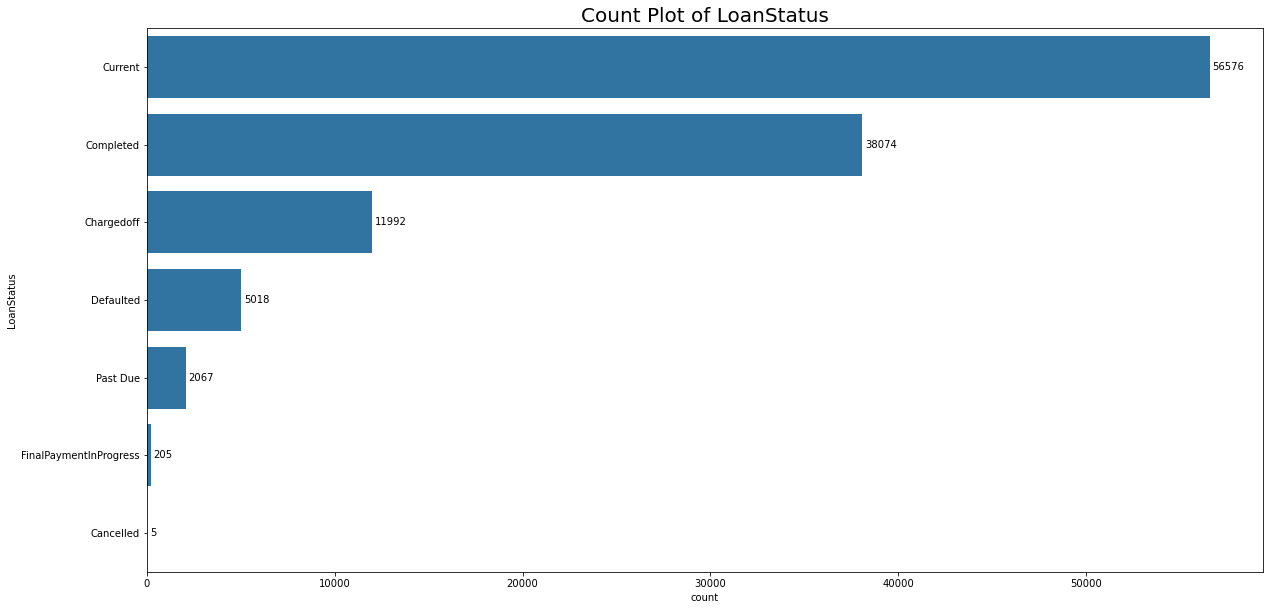

In [5]:
#Plot LoanStatus count
plt.figure(figsize=[20,10])
sb.countplot(data=loan_subset, y='LoanStatus', order = loan_order,color=base_color);
plt.title('Count Plot of LoanStatus',fontsize=20)

for item in range(loan_count.shape[0]):
    count = loan_count[item]
    count_string= '{}'.format(count)
    plt.text(count+150, item, count_string, va='center')

## The relationship between LoanStatus and BorrowerRate¶

> The plot shows the relationship between LoanStatus and BorrowerRate. The LoanStatus and BorrowerRate boxplot shows that Borrowers with pastdue, chargedoff and defaulted categories have the hightest interest rates compared to Borrowers who completed payment of their loans.

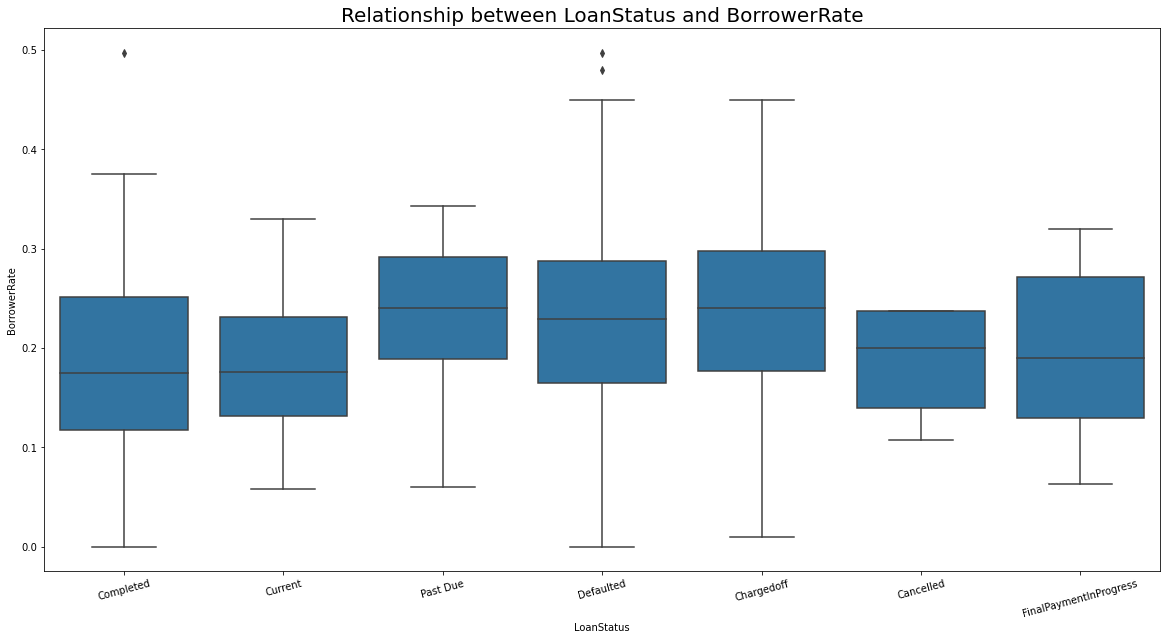

In [6]:
# Plot of LoanStatus and BorrowerRate
plt.figure(figsize=[20,10])
sb.boxplot(data = loan_subset, x = 'LoanStatus', y = 'BorrowerRate',color=base_color);
plt.xticks(rotation = 15)
plt.title('Relationship between LoanStatus and BorrowerRate',fontsize=20);

## The relationship between LoanStatus and EmploymentStatus 

> The plot shows the relationship between LoanStatus and EmploymentStatus. The loanStatus and Employmentstatus heatmap shows that in all the LoanStatus categories, most borrowers are employed either full-time, part-time or self-employed. In essence, most of the loans are given to people who are employed.

In [7]:
# Get the EmploymentStatus data into desirable format - a DataFrame
loan_employstatus = loan_subset.groupby(['LoanStatus', 'EmploymentStatus']).size()
# Use Series.reset_index() to convert a series into a dataframe object
loan_employstatus = loan_employstatus.reset_index(name = 'count')
# Use DataFrame.pivot() to rearrange the data, to have loanStatus on rows
loan_employstatus = loan_employstatus.pivot(index = 'LoanStatus', columns = 'EmploymentStatus', 
                                            values = 'count')

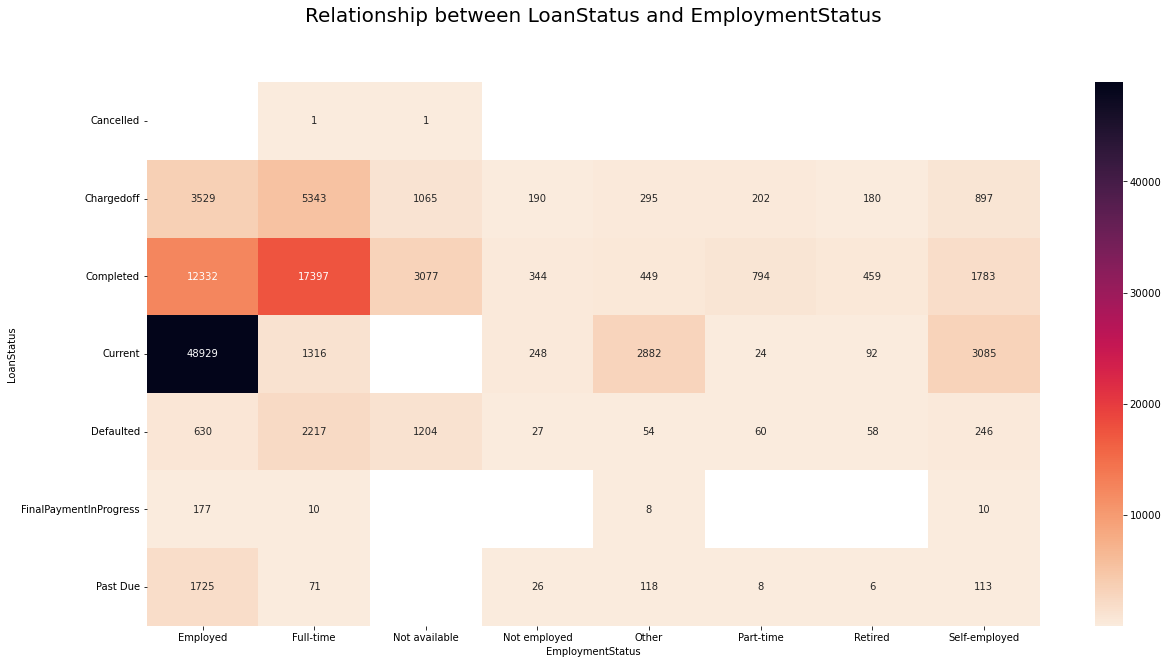

In [8]:
# Plot the heatmap of LoanStatus and EmploymentStatus
plt.figure(figsize = [20, 10])
cmap = sb.cm.rocket_r
sb.heatmap(loan_employstatus, annot=True, fmt = '.0f',cmap=cmap);
plt.title('Relationship between LoanStatus and EmploymentStatus', y=1.1, fontsize=20);

## The relationship between LoanStatus, BorrowerRate and IsBorrowerHomeowner

> The plot shows ISBorrowerHomeowner against LoanStatus and BorrowerRate. From the violinplot, we see that completed status has a lower borrower's rate compared to past due, defaulted or chargedoff. When IsBorrowerHomeOwner is added, we can see that most borrowers who own a home had lesser borrower rates compared to those that do not own homes. Even Lower borrower rates would also apply to those who completed and own homes.


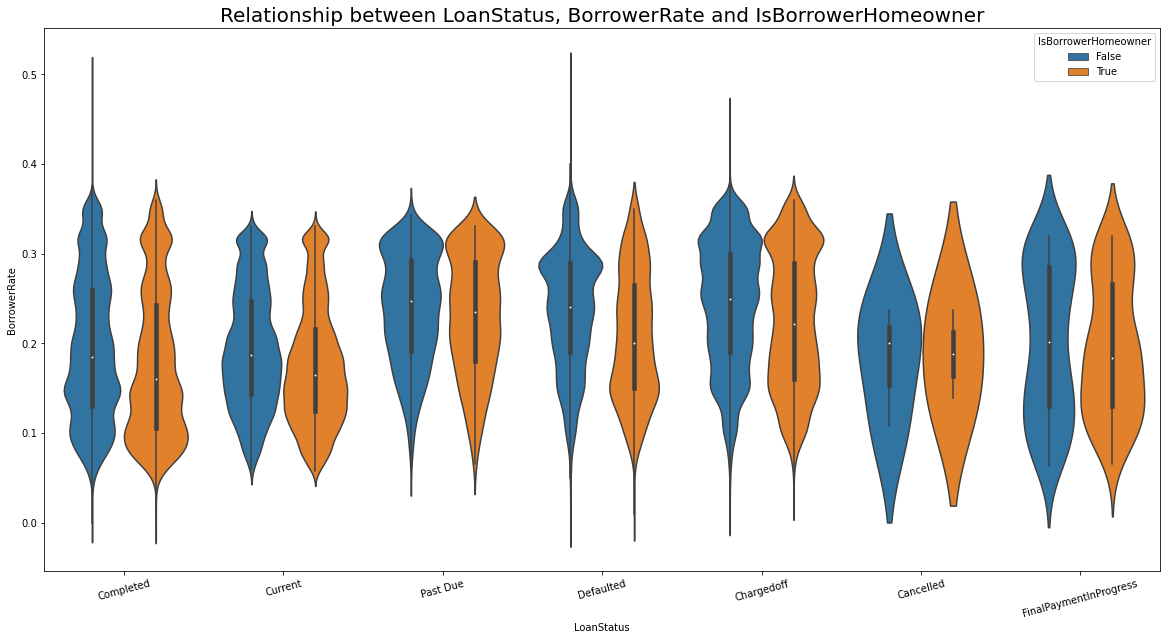

In [9]:
# Plot of BorrowerRate, IsBorrowerHomeowner and LoanStatus
plt.figure(figsize=[20,10])
sb.violinplot(data=loan_subset, x='LoanStatus', y='BorrowerRate', hue = 'IsBorrowerHomeowner')
plt.xticks(rotation=15);
plt.title('Relationship between LoanStatus, BorrowerRate and IsBorrowerHomeowner', fontsize=20);

In [10]:
!jupyter nbconvert <Factors Affecting Loan Outcome II>.ipynb --to slides --post serve --no-input --no-prompt

zsh:1: no such file or directory: Factors
